## 지수 평활법을 활용한 이상치 탐지

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [7]:
# 시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = [10, 12, 11, 15, 9, 13, 8, 14, 10, 16] +[10] *90  #이상치 포함된 데이터

#데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'value' : values
})

print(data)

         Date  value
0  2023-01-01     10
1  2023-01-02     12
2  2023-01-03     11
3  2023-01-04     15
4  2023-01-05      9
..        ...    ...
95 2023-04-06     10
96 2023-04-07     10
97 2023-04-08     10
98 2023-04-09     10
99 2023-04-10     10

[100 rows x 2 columns]


values 는 10, 12, 11, 15, 9, 13, 8, 14, 10, 16으로 시작하고, 그 뒤에 10이 총 90번 반복되는 형태입니다. 이렇게 반복되는 10은 이상치로 간주될 수 있습니다.

#### 지수평활법 모델 학습

In [8]:
model = ExponentialSmoothing(data['value'], trend='add')
model_fit = model.fit()

다른 추세 모델링 방식으로는 'mul' (곱셈), 'additive' (가법), 'multiplicative' (승법)

In [9]:
# 추세 계산
trend = model_fit.predict(start=0, end=len(data['value']) - 1)

# 추세에서의 편차 계산
deviation = data['value'] - trend

### 이상치 탐지 및 시각화

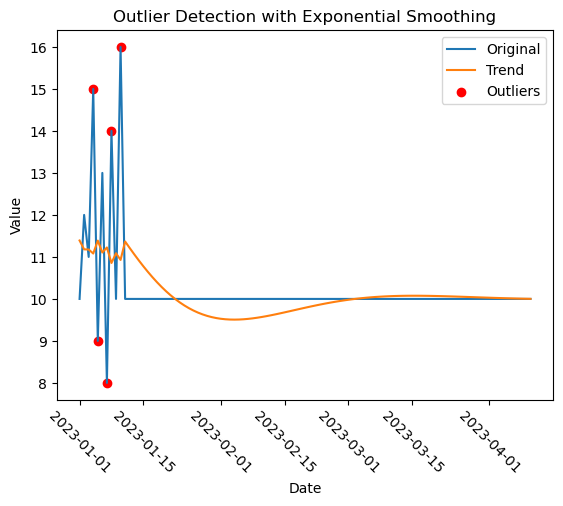

In [11]:
# 이상치 탐지
threshold = 2
outliers = abs(deviation) > threshold

# 시각화
# 시계열 데이터 시각화
plt.plot(data['Date'], data['value'], label='Original')
plt.plot(data['Date'], trend, label='Trend')
plt.scatter(data[outliers]['Date'], data[outliers]['value'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection with Exponential Smoothing')
plt.legend()
plt.xticks(rotation=-45)
plt.show()